In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
supply_data = pd.read_excel("Supply.xlsx")
demand_data = pd.read_excel("Demand.xlsx")

In [3]:
supply_data.head()

,DATE,CSUSHPISA,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units
0,2003-01-01,129.320667,4.200000,1806.333333,421328.666667,14908
1,2003-04-01,131.755667,3.833333,1837.666667,429308.666667,15244
2,2003-07-01,135.013000,3.633333,1937.333333,458890.000000,15614
3,2003-10-01,138.834667,3.966667,1972.333333,491437.333333,15654
4,2004-01-01,143.298667,3.700000,1994.666667,506856.333333,15895


In [4]:
demand_data.head()

,DATE,CSUSHPISA,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
0,2003-01-01,129.320667,5.204615,79.966667,2.250000,186000.0,11174.129,5.866667
1,2003-04-01,131.755667,4.867692,89.266667,2.166667,191800.0,11312.766,6.133333
2,2003-07-01,135.013000,5.356923,89.300000,2.000000,191900.0,11566.669,6.133333
3,2003-10-01,138.834667,5.248571,91.966667,2.000000,198800.0,11772.234,5.833333
4,2004-01-01,143.298667,4.897500,98.000000,2.000000,212700.0,11923.447,5.700000


In [5]:
merged_data = pd.merge(supply_data, demand_data, on='DATE', suffixes=('_supply', '_demand'))

In [6]:
merged_data.head()

,DATE,CSUSHPISA_supply,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units,CSUSHPISA_demand,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
0,2003-01-01,129.320667,4.200000,1806.333333,421328.666667,14908,129.320667,5.204615,79.966667,2.250000,186000.0,11174.129,5.866667
1,2003-04-01,131.755667,3.833333,1837.666667,429308.666667,15244,131.755667,4.867692,89.266667,2.166667,191800.0,11312.766,6.133333
2,2003-07-01,135.013000,3.633333,1937.333333,458890.000000,15614,135.013000,5.356923,89.300000,2.000000,191900.0,11566.669,6.133333
3,2003-10-01,138.834667,3.966667,1972.333333,491437.333333,15654,138.834667,5.248571,91.966667,2.000000,198800.0,11772.234,5.833333
4,2004-01-01,143.298667,3.700000,1994.666667,506856.333333,15895,143.298667,4.897500,98.000000,2.000000,212700.0,11923.447,5.700000


In [7]:
merged_data.isnull().sum()

DATE                           0
CSUSHPISA_supply               0
Monthly_Supply_New_Houses      0
Permit                         0
Total_Construction_Spending    0
Vacant_Housing_Units           0
CSUSHPISA_demand               0
Mortgage_Average               0
Consumer_Sentiment             0
Interest_Rate                  0
Sales_Price_of_Houses_Sold     0
GDP                            0
Unemployment_rate              0
dtype: int64

In [8]:
merged_data.drop('CSUSHPISA_supply', axis=1, inplace=True)

merged_data.rename(columns={'CSUSHPISA_demand': 'CSUSHPISA'}, inplace=True)

In [9]:
merged_data.head()

,DATE,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units,CSUSHPISA,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
0,2003-01-01,4.200000,1806.333333,421328.666667,14908,129.320667,5.204615,79.966667,2.250000,186000.0,11174.129,5.866667
1,2003-04-01,3.833333,1837.666667,429308.666667,15244,131.755667,4.867692,89.266667,2.166667,191800.0,11312.766,6.133333
2,2003-07-01,3.633333,1937.333333,458890.000000,15614,135.013000,5.356923,89.300000,2.000000,191900.0,11566.669,6.133333
3,2003-10-01,3.966667,1972.333333,491437.333333,15654,138.834667,5.248571,91.966667,2.000000,198800.0,11772.234,5.833333
4,2004-01-01,3.700000,1994.666667,506856.333333,15895,143.298667,4.897500,98.000000,2.000000,212700.0,11923.447,5.700000


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         82 non-null     datetime64[ns]
 1   Monthly_Supply_New_Houses    82 non-null     float64       
 2   Permit                       82 non-null     float64       
 3   Total_Construction_Spending  82 non-null     float64       
 4   Vacant_Housing_Units         82 non-null     int64         
 5   CSUSHPISA                    82 non-null     float64       
 6   Mortgage_Average             82 non-null     float64       
 7   Consumer_Sentiment           82 non-null     float64       
 8   Interest_Rate                82 non-null     float64       
 9   Sales_Price_of_Houses_Sold   82 non-null     float64       
 10  GDP                          82 non-null     float64       
 11  Unemployment_rate            82 non-null     fl

In [11]:
merged_data.describe()

,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units,CSUSHPISA,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,6.179268,1312.483740,500731.199187,17074.134146,183.567545,4.107128,81.908537,86756.449187,282656.097561,17415.122317,5.951626
std,1.916255,474.382467,186961.290579,1390.719813,44.891274,1.215114,12.523287,265888.362085,69112.688616,3971.001826,2.039858
min,3.366667,538.666667,246953.333333,13876.000000,129.320667,2.171429,56.100000,0.250000,186000.000000,11174.129000,3.500000
25%,4.825000,997.500000,359315.916667,15838.000000,148.215917,3.124986,73.266667,0.750000,228275.000000,14477.690750,4.500000
50%,5.600000,1285.666667,499146.833333,17263.000000,173.772667,3.832308,82.900000,1.666667,261600.000000,16664.300500,5.383333
75%,7.516667,1692.583333,589578.333333,18208.500000,200.870833,5.277308,92.916667,3.125000,319975.000000,20090.302000,7.158333
max,11.400000,2228.333333,973236.666667,19137.000000,303.115333,6.228462,98.933333,973236.666667,479500.000000,26798.605000,12.966667


### Exploratory data analysis

In [12]:
merged_data.corr()

,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units,CSUSHPISA,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
Monthly_Supply_New_Houses,1.000000,-0.454899,-0.080381,0.396653,0.165869,0.438095,-0.614107,0.268220,0.049437,0.091014,0.031334
Permit,-0.454899,1.000000,0.733634,-0.822227,0.365395,0.290359,0.413024,0.224773,0.217699,0.011688,-0.596828
Total_Construction_Spending,-0.080381,0.733634,1.000000,-0.828202,0.894810,0.079500,0.050459,0.690778,0.783473,0.630767,-0.659597
Vacant_Housing_Units,0.396653,-0.822227,-0.828202,1.000000,-0.618188,-0.050908,-0.177967,-0.467859,-0.516316,-0.366176,0.424776
CSUSHPISA,0.165869,0.365395,0.894810,-0.618188,1.000000,-0.092647,-0.182856,0.802416,0.942899,0.876382,-0.532414
Mortgage_Average,0.438095,0.290359,0.079500,-0.050908,-0.092647,1.000000,-0.130136,0.050170,-0.346153,-0.460052,-0.220576
Consumer_Sentiment,-0.614107,0.413024,0.050459,-0.177967,-0.182856,-0.130136,1.000000,-0.492731,-0.113059,-0.147807,-0.425508
Interest_Rate,0.268220,0.224773,0.690778,-0.467859,0.802416,0.050170,-0.492731,1.000000,0.748643,0.663223,-0.339302
Sales_Price_of_Houses_Sold,0.049437,0.217699,0.783473,-0.516316,0.942899,-0.346153,-0.113059,0.748643,1.000000,0.959804,-0.483814
GDP,0.091014,0.011688,0.630767,-0.366176,0.876382,-0.460052,-0.147807,0.663223,0.959804,1.000000,-0.376007


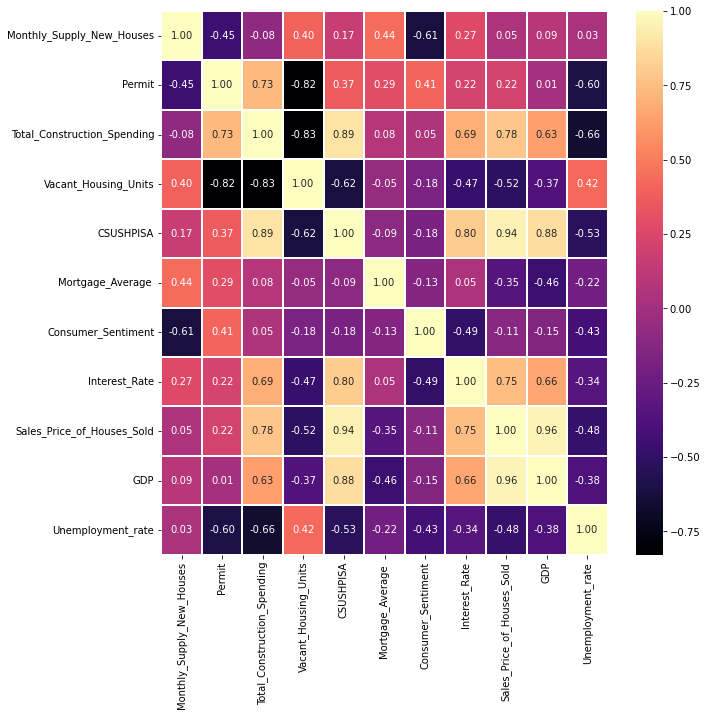

In [13]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(merged_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on correlation
plt.show()

In [14]:
dups = merged_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


1. From the above heatmap and Correlation values we can say that CSUSHPISA is highly positively correlated with Sales Priceof Houses sold with correlation of 0.94, GDP with correlation value 0.88, Interest rate with rate 0.80.
2. Total Construction Spending is positively correlated with CSUSHPISA woth value 0.89, Sales price of house sold of value 0.75.
3. Sales price of house sold is positively related with GDP with value 0.96.

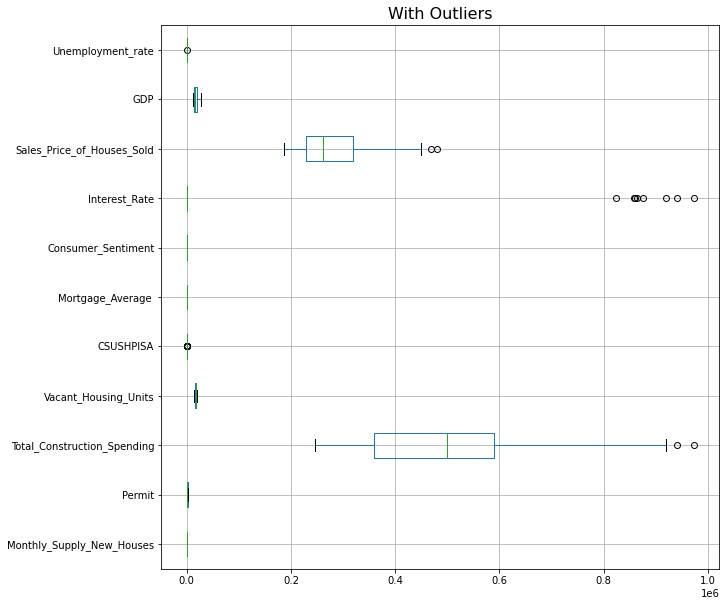

In [15]:
# construct box plot for continuous variables
cont=merged_data.dtypes[(merged_data.dtypes!='uint8') & (merged_data.dtypes!='bool')].index
plt.figure(figsize=(10,10))
merged_data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in merged_data[cont].columns:
    lr,ur=remove_outlier(merged_data[column])
    merged_data[column]=np.where(merged_data[column]>ur,ur,merged_data[column])
    merged_data[column]=np.where(merged_data[column]<lr,lr,merged_data[column])

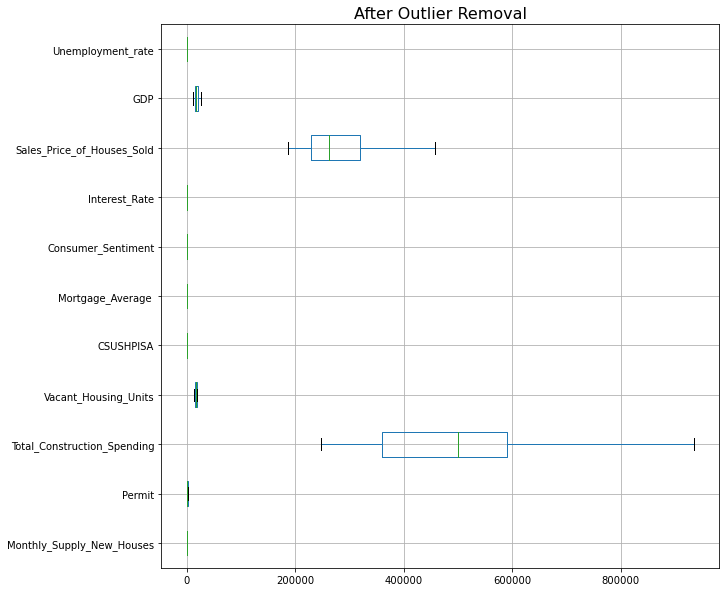

In [18]:
plt.figure(figsize=(10,10))
merged_data[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [19]:
merged_data1=merged_data.copy()

In [20]:
# Separating the target variable and the independent variable
y = merged_data1.pop("CSUSHPISA")
X = merged_data1

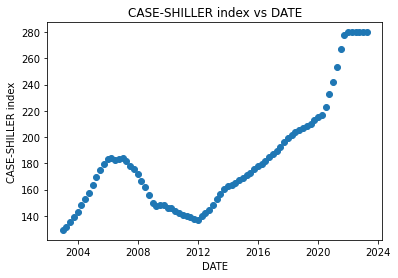

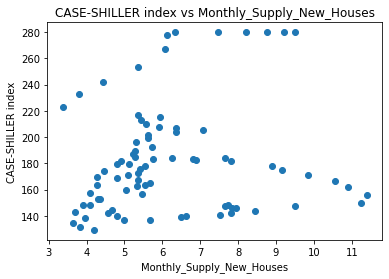

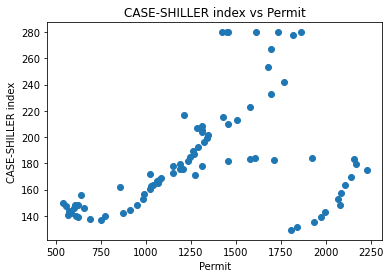

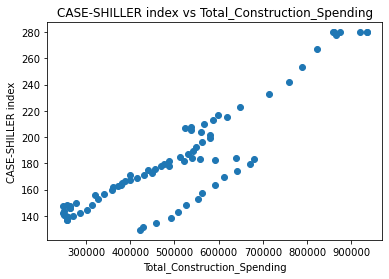

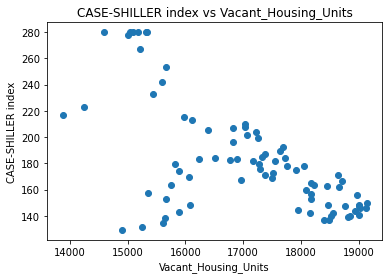

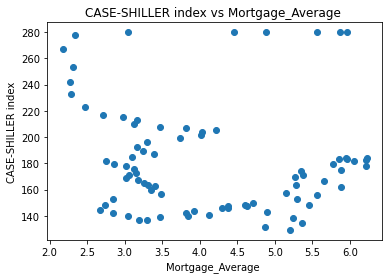

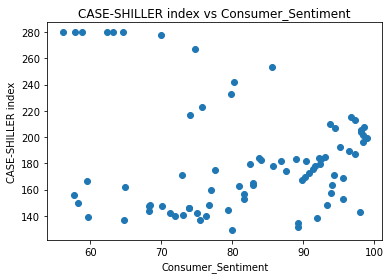

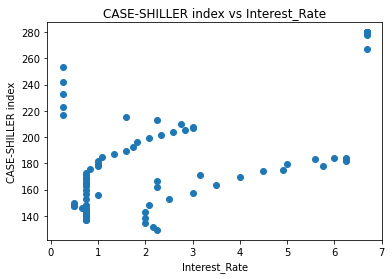

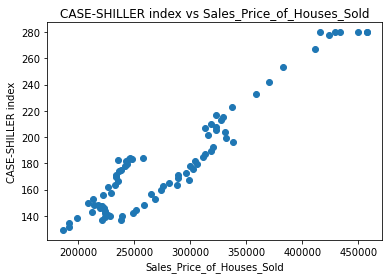

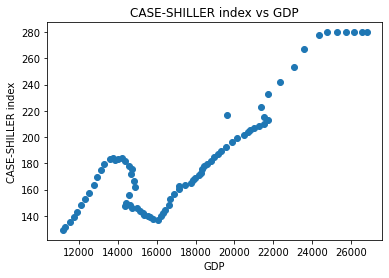

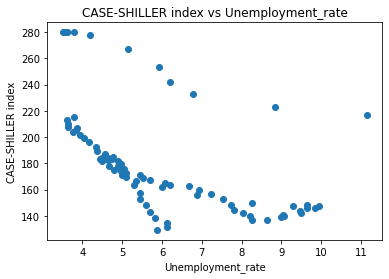

In [21]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

1. Unemployment rate is negatively correlated with home prices which is very natural.
2. Impact of great recession is impacted on almost all the plots.
3. Except Interest Rate, Mortgage, Vacant housing unit rest all are positively correlated with the Home prices.

### Model Building

In [22]:
X = merged_data.drop('CSUSHPISA', axis=1)
y = merged_data['CSUSHPISA']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [24]:
def correlation(X,threshold):
    correlated_cols=set()
    corr_matrix=X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [25]:
corr_feature=correlation(X,0.7)

In [26]:
corr_feature

{'GDP',
 'Sales_Price_of_Houses_Sold',
 'Total_Construction_Spending',
 'Vacant_Housing_Units'}

In [27]:
X.drop(columns = corr_feature, inplace = True)

In [35]:
X_train

,Monthly_Supply_New_Houses,Permit,Total_Construction_Spending,Vacant_Housing_Units,Mortgage_Average,Consumer_Sentiment,Interest_Rate,Sales_Price_of_Houses_Sold,GDP,Unemployment_rate
31,7.800000,583.333333,248572.666667,18551.0,3.820000,71.266667,0.750000,224300.0,15309.471,9.500000
51,5.400000,1205.000000,455911.666667,17288.0,3.123571,91.300000,0.833333,302500.0,18332.079,5.033333
39,4.666667,915.000000,302709.333333,17939.0,2.670000,79.400000,0.750000,251700.0,16420.386,7.800000
2,3.633333,1937.333333,458890.000000,15614.0,5.356923,89.300000,2.000000,191900.0,11566.669,6.133333
33,6.633333,611.666667,254937.333333,18843.0,3.844615,71.866667,0.750000,228100.0,15557.535,9.066667
...,...,...,...,...,...,...,...,...,...,...
75,6.133333,1816.666667,864116.333333,15009.0,2.338462,69.900000,6.687500,423600.0,24349.121,4.200000
9,4.266667,2137.666667,611957.000000,16061.0,5.276154,90.200000,4.000000,233700.0,12922.656,5.100000
72,4.433333,1765.666667,759608.000000,15602.0,2.276667,80.233333,0.250000,369800.0,22313.850,6.200000
12,5.766667,2157.000000,680067.333333,16234.0,5.855385,88.933333,5.583333,247700.0,13599.160,4.733333


In [36]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [41]:
regression_model.score(X_train, y_train)

0.9921637235528287

In [42]:
predicted_train=regression_model.predict(X_train)
predicted_train

array([147.46013912, 174.7867584 , 147.15175563, 135.30448831,
       142.92268958, 142.50753069, 163.69892866, 177.42256206,
       212.42859869, 204.8936651 , 169.98072107, 154.85794555,
       269.09664973, 217.46247289, 140.95000324, 279.11927938,
       155.01576722, 203.96242088, 142.85089287, 163.37552583,
       279.70069286, 142.73203177, 192.02833309, 188.9653227 ,
       158.45625268, 178.49357707, 154.6775355 , 165.11123315,
       177.82267242, 127.98011699, 249.59491364, 179.10093822,
       158.25009482, 290.38175948, 197.21830228, 184.06699338,
       162.44859976, 144.57073395, 149.20622332, 185.72512508,
       172.1276065 , 149.39729045, 202.20058557, 156.00758943,
       146.10969443, 213.26888044, 181.04372363, 148.14554814,
       146.84548527, 180.344136  , 177.38198672, 165.0988611 ,
       173.49433551, 145.77949825, 156.50934942, 226.14188528,
       131.91001461, 180.20771434, 203.37646421, 148.21705432,
       275.50025313, 169.1980815 , 237.72918783, 189.65

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#MSE on training data
#Summation(Y - Y HAT)^2/N
metrics.mean_squared_error(y_train,predicted_train)

11.862851758540563

In [45]:
#RMSE of Train Data
np.sqrt(11.862851758540563)

3.444249084857331

In [48]:
regression_model.score(X_test, y_test)

0.9939331065645612

In [50]:
predicted_test=regression_model.predict(X_test)
predicted_test

array([176.03006683, 216.55560315, 163.9557344 , 180.50876018,
       146.43794553, 205.72837392, 197.09066452, 276.27951447,
       289.73021939, 160.82870579, 283.56238139, 210.74728806,
       166.76968719, 139.00363439, 205.7574299 , 144.54696756,
       140.07432628])

In [51]:
#MSE on testing data
#Summation(Y - Y HAT)^2/N
metrics.mean_squared_error(y_test,predicted_test)

13.19616983367323

In [52]:
#RMSE of Test Data
np.sqrt(13.19616983367323)

3.6326532773818685

In [54]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm


In [55]:
ols_model=sm.OLS(y_train,X_train).fit()

In [56]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              CSUSHPISA   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.508e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    9.49e-91
Time:                        22:54:05   Log-Likelihood:                         -173.59
No. Observations:                  65   AIC:                                      367.2
Df Residuals:                      55   BIC:                                      388.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Monthly_Supply_New_Houses       4.5529      0.722      6.306      0.000       3.106       6.000
Permit                         -0.0021      0.005     -0.392      0.696      -0.013       0.008
Total_Construction_Spending     0.0002   2.06e-05      7.799      0.000       0.000       0.000
Vacant_Housing_Units           -0.0002      0.001     -0.251      0.802      -0.002       0.001
Mortgage_Average               -4.3799      0.973     -4.500      0.000      -6.330      -2.429
Consumer_Sentiment              0.1567      0.074      2.120      0.039       0.009       0.305
Interest_Rate                   2.1493      0.468      4.593      0.000       1.212       3.087
Sales_Price_of_Houses_Sold  -7.002e-05   6.07e-05     -1.155      0.253      -0.000    5.15e-05
GDP                             0.0050      0.001      5.712      0.000       0.003       0.007
Unemployment_rate               2.0879      0.397      5.254      0.000       1.292       2.884
==============================================================================
Omnibus:                        0.162   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.032
Skew:                           0.054   Prob(JB):                        0.984
Kurtosis:                       2.984   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation and Insights:

Supply Factors:
1. The S&P/Case-Shiller U.S. National Home Price Index  shows a very modest positive association with the monthly supply of new homes . Because the correlation is so weak, we can conclude it is negative (because supply increase). 
2. This implies that an increase in the supply of new homes may have a minor negative influence on housing prices.
3. The number of authorised housing units  has a moderately positive link with home values. This means that a greater number of authorised housing units may contribute to higher property prices. The reason for this is that when more houses are authorised for building, the supply of houses, materials, and labours is impacted.
4. Total construction spending on residential projects has a strong positive correlation with home prices. This indicates that higher construction spending is strongly associated with higher home prices. The reason for this is simple: construction costs include building materials, labour, and other charges. This raises overall house costs.
5. The estimated number of vacant housing units has a moderate negative correlation with home prices. This suggests that a higher number of vacant housing units may exert downward pressure on home prices. Because houses supply increases leads to decrease in home prices.

Demand Factors:
1. The average interest rate for a 30-year fixed-rate mortgage shows a weak negative correlation with home prices. This implies that higher mortgage rates are associated with slightly lower home prices. A rise in the federal funds rate can cause mortgage rates to rise, and higher mortgage rates can reduce home buying demand, causing home prices to fall.
2. Consumer sentiment has a weak negative correlation with home prices. Lower consumer sentiment is associated with slightly lower home prices. When consumers are confident about the economy, they are more likely to spend money on big-ticket items such as homes which can drive up home prices.
3. Data show that interest rates or discount rates  have a weak positive association with home prices, indicating a scaling or trailing issue. Interest rates are negatively correlated with house prices. Higher rates are leads to lower home prices.

4. Gross Domestic Product (GDP) has a strong positive correlation with home prices. Higher GDP is strongly associated with higher home prices.
5. The median sales price of houses sold has a strong positive correlation with home prices. Higher median sales prices are strongly associated with higher home prices.

### CONCLUSION

Based on the correlation analysis and the coefficients from the Linear Regression model, several key insights can be derived:

1. Supply factors, such as house inventory and the number of authorized housing units, have a positive influence on home prices. Higher construction spending on residential projects also contributes significantly to higher home prices.
2. Demand factor, such as mortgage interest rates, have a negative impact on home prices. Higher mortgage rates and lower consumer sentiment are associated with slightly lower home prices.
3. Economic factors, including GDP and interest rates, play a crucial role in determining home prices. A strong economy with higher GDP and slightly lower interest rates tends to support higher home prices.
4. The median sales price of houses sold is strongly correlated with home prices, reflecting the importance of market dynamics and buyer behaviour in determining home price movements.
5. These insights can be valuable for various stakeholders in the real estate market, including home buyers, sellers, developers, and policymakers. Understanding the factors that influence home prices can help make informed decisions related to investments, financing, and economic policies.